In [1]:
import pandas as pd
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

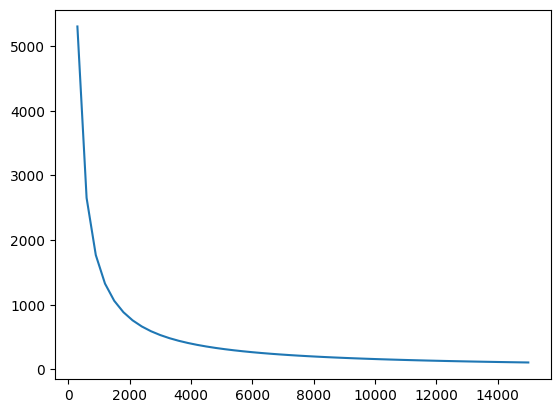

In [3]:
kilo = 1000
milli = 10**-3
micro = 10**-6
C1 = 0.1*micro
C1
freqs = np.linspace(300,15_000)
capacitive_reactance_theoretical = 1/(freqs*(2*np.pi*C1))
capacitive_reactance_theoretical
sns.lineplot(x=freqs,y=capacitive_reactance_theoretical)

In [4]:

data = """
Frequency   Resistor_Voltage    Capacitor_Voltage    Current       Observed_Reactance      Theoretical_Reactance
300         0.2   0.95  0.2     4750    4800
1000        0.51  0.82  0.52    1600    1450
3000        0.84  0.45  0.84    535.7   482
5000        0.89  0.3   0.89    337     289
7000        0.9   0.22  0.9     244     206.7
9000        0.93  0.18  0.93    193.5   160.8
11000       0.94  0.15  0.94    159.6   131.5
13000       0.945 0.13  0.945   137.6   111.3
15000       0.95  0.12  0.95    126.3   96.5
"""

# Create a DataFrame from the provided data
df = pd.read_csv(StringIO(data), delim_whitespace=True)

# Display the DataFrame
df


,Frequency,Resistor_Voltage,Capacitor_Voltage,Current,Observed_Reactance,Theoretical_Reactance
0,300,0.200,0.95,0.200,4750.0,4800.0
1,1000,0.510,0.82,0.520,1600.0,1450.0
2,3000,0.840,0.45,0.840,535.7,482.0
3,5000,0.890,0.30,0.890,337.0,289.0
4,7000,0.900,0.22,0.900,244.0,206.7
5,9000,0.930,0.18,0.930,193.5,160.8
6,11000,0.940,0.15,0.940,159.6,131.5
7,13000,0.945,0.13,0.945,137.6,111.3
8,15000,0.950,0.12,0.950,126.3,96.5


In [5]:
melted_df = pd.melt(df, id_vars=['Frequency'], var_name='Category', value_name='Value')

# Display the melted DataFrame
print(melted_df.Category.unique())
melted_df.head()


['Resistor_Voltage' 'Capacitor_Voltage' 'Current' 'Observed_Reactance'
 'Theoretical_Reactance']


,Frequency,Category,Value
0,300,Resistor_Voltage,0.20
1,1000,Resistor_Voltage,0.51
2,3000,Resistor_Voltage,0.84
3,5000,Resistor_Voltage,0.89
4,7000,Resistor_Voltage,0.90


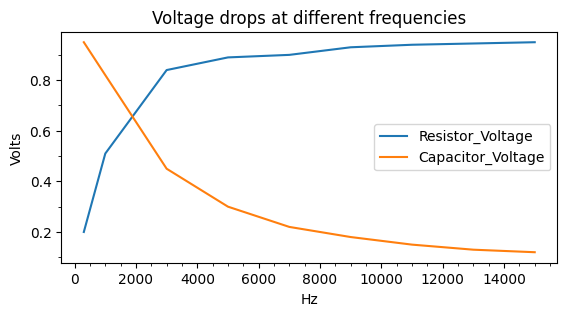

In [6]:
rc_voltages = melted_df[melted_df['Category'].isin(['Resistor_Voltage', 'Capacitor_Voltage'])]
fig1 = plt.figure()
ax = sns.lineplot(rc_voltages, x='Frequency', y='Value', hue='Category')
ax.set_ylabel("Volts")
ax.set_xlabel("Hz")
ax.set_title("Voltage drops at different frequencies")
ax.xaxis.set_minor_locator(plt.MultipleLocator(500))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.legend(title=None)
fig1.set_figheight(3)

In [7]:
kilo = 1000
milli = 10**-3
micro = 10**-6


In [8]:

C1 = 0.1*micro
C1


1e-07

<AxesSubplot:>

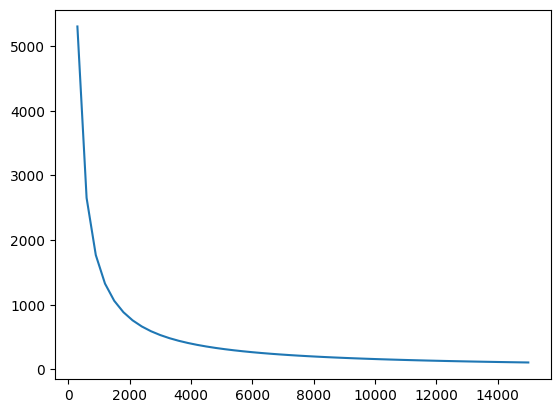

In [9]:
freqs = np.linspace(300,15_000)
capacitive_reactance_theoretical = 1/(freqs*(2*np.pi*C1))
capacitive_reactance_theoretical
sns.lineplot(x=freqs,y=capacitive_reactance_theoretical)

In [10]:
X_C = melted_df[melted_df['Category']== 'Observed_Reactance']
X_C

,Frequency,Category,Value
27,300,Observed_Reactance,4750.0
28,1000,Observed_Reactance,1600.0
29,3000,Observed_Reactance,535.7
30,5000,Observed_Reactance,337.0
31,7000,Observed_Reactance,244.0
32,9000,Observed_Reactance,193.5
33,11000,Observed_Reactance,159.6
34,13000,Observed_Reactance,137.6
35,15000,Observed_Reactance,126.3


Text(0.5, 1.0, '$X_C$ vs Frequency')

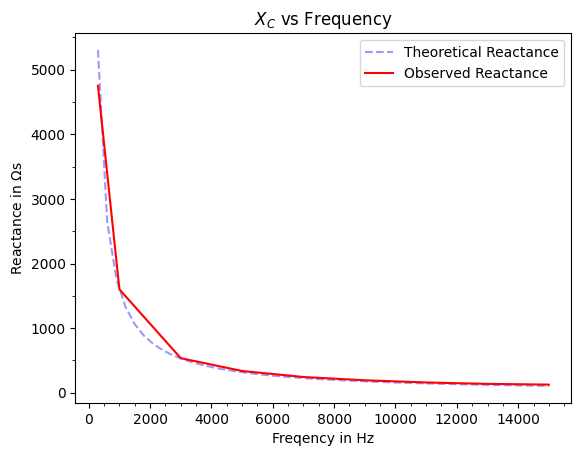

In [16]:
fig2 = plt.figure()
ax = plt.gca()
ax.plot(freqs,capacitive_reactance_theoretical, color='blue', alpha=0.4, linestyle='--', label='Theoretical Reactance')
ax.plot(X_C['Frequency'],X_C['Value'], color='red', alpha=1, label='Observed Reactance')
ax.xaxis.set_minor_locator(plt.MultipleLocator(500))
ax.yaxis.set_minor_locator(plt.MultipleLocator(500))
ax.legend()
ax.set_xlabel('Freqency in Hz')
ax.set_ylabel("Reactance in $\Omega$s")
ax.set_title('$X_C$ vs Frequency')